In [2]:
import yfinance as yf

In [3]:
import pandas as pd

In [4]:
from pypfopt.efficient_frontier import EfficientFrontier
from  pypfopt import expected_returns, risk_models

In [19]:
from pypfopt import plotting

In [23]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [5]:
sp500 = pd.read_html('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol']

In [6]:
sp500.tolist()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [8]:
dfr = yf.download(sp500.tolist(), start='2020-01-01')['Close']

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 -> 2024-03-30)')


In [9]:
dfr.shape

(1067, 503)

In [13]:
df=dfr.dropna(axis='rows', thresh=50).dropna(axis='columns', how='any')
df.shape

(1067, 494)

In [17]:
df.sample(3)

Ticker,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-05,127.879997,13.13,193.419998,144.570007,104.349998,81.849998,335.829987,602.219971,180.630005,74.139999,...,31.290001,82.209999,61.029999,100.440002,32.18,105.790001,124.379997,115.820000,234.360001,179.649994
2021-12-23,157.800003,18.26,176.279999,133.089996,139.160004,43.480000,403.309998,569.619995,172.660004,65.440002,...,38.639999,88.879997,66.610001,61.020000,55.43,117.500000,135.339996,123.291260,582.409973,242.509995
2021-07-13,149.270004,20.02,145.639999,117.910004,118.650002,37.540001,312.630005,605.010010,167.259995,59.240002,...,34.610001,111.550003,67.580002,60.880001,62.00,120.769997,117.089996,152.466019,533.619995,199.309998


In [60]:
' \N{GREEK small LETTER mu},\N{GREEK CAPITAL LETTER SIGMA} '


' μ,Σ '

In [58]:
μ = expected_returns.mean_historical_return(df)
Σ = risk_models.sample_cov(df)


In [148]:
μ = expected_returns.ema_historical_return(df)
# Σ = risk_models.semicovariance(df)
Σ = risk_models.CovarianceShrinkage(df,).S


In [149]:
μ.mean()

0.23340079973405198

In [150]:
ef = EfficientFrontier(μ,Σ)
weights = ef.efficient_return(.3)
# weights = ef.efficient_risk(.12)
weights = ef.clean_weights(cutoff=.02)
ef.portfolio_performance(verbose=True);

Expected annual return: 30.0%
Annual volatility: 0.9%
Sharpe Ratio: 30.92


In [151]:
ef.set_weights(weights)
ef.portfolio_performance(verbose=True);

Expected annual return: 28.9%
Annual volatility: 0.8%
Sharpe Ratio: 32.26


In [152]:
weights={k:v for k,v in weights.items() if v>0}

In [153]:
wnames = {name(k):v for k,v in weights.items()}

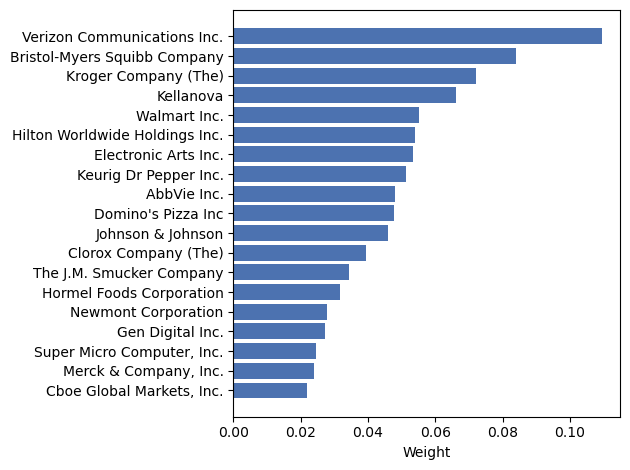

In [154]:
plotting.plot_weights(wnames,);

In [119]:
def name(sym):
    return yf.Ticker(sym).get_info()['shortName']
name('jnj')

'Johnson & Johnson'

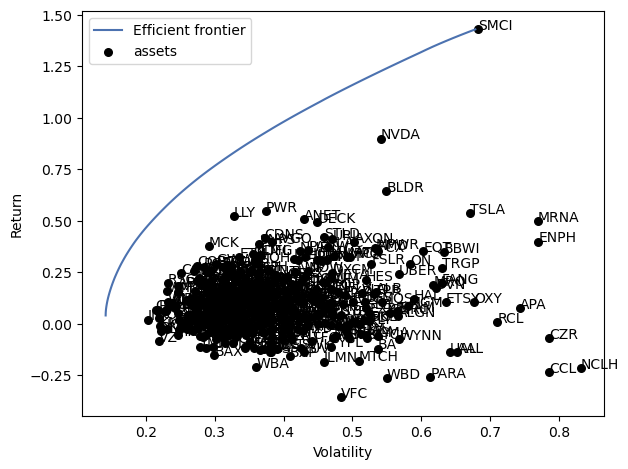

In [65]:
plotting.plot_efficient_frontier(
    EfficientFrontier(mu, S), 
    show_tickers=True
);

In [37]:
(pd.Series(weights)*mu).sum()

0.03945203410328839

In [40]:
sum(weights.values())

0.9999999999999991

In [41]:
mu.mean()

0.09466686009904841